In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data = pd.read_csv(r'C:\Users\asina\OneDrive\Masaüstü\bitirme\amazon.csv')
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [53]:
for i in range(1, 4):
    column_name = f'subcategory_{i}'
    data[column_name] = data['category'].str.split("|").str[-i]

data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'subcategory_1',
       'subcategory_2', 'subcategory_3'],
      dtype='object')

In [54]:
data['discounted_price'] = data['discounted_price'].apply(lambda x: x.replace('₹',''))
data['actual_price'] = data['actual_price'].apply(lambda x: x.replace('₹',''))
data['discount_percentage'] = data['discount_percentage'].apply(lambda x: x.replace('%',''))
data = data.drop('category', axis=1)

# renaming specific columns
data = data.rename(columns={'subcategory_1': 'category', 'subcategory_2':'subcategory','subcategory_3' :'main_category'})



data.columns

Index(['product_id', 'product_name', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'about_product',
       'user_id', 'user_name', 'review_id', 'review_title', 'review_content',
       'img_link', 'product_link', 'category', 'subcategory', 'main_category'],
      dtype='object')

In [40]:
def check_duplicates(dataframe):
    return dataframe.duplicated().sum()

print(check_duplicates(data))

0


In [41]:
data.isna().sum()

product_id             0
product_name           0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
category               0
subcategory            0
main_category          8
dtype: int64

In [42]:
data =data.dropna()
data.isna().sum()

product_id             0
product_name           0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
category               0
subcategory            0
main_category          0
dtype: int64

In [43]:
def replace_comma(data,columns):
    for col in columns:
        data[col] = data[col].str.replace(',','')
    
columns = ['actual_price', 'rating','rating_count', 'discounted_price']
replace_comma(data,columns)

In [44]:
def change_type(data,columns):
    for col in columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = np.round(data[col].fillna(0)).astype('Int64')
columns  = ['actual_price','rating_count', 'discounted_price','discount_percentage']
change_type(data, columns)

In [45]:
data['discount_percentage'] = data['discount_percentage'] / 100

data['rating'] = data['rating'].str.replace('|','0')
data['rating'] = data['rating'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1455 non-null   object 
 1   product_name         1455 non-null   object 
 2   discounted_price     1455 non-null   Int64  
 3   actual_price         1455 non-null   Int64  
 4   discount_percentage  1455 non-null   Float64
 5   rating               1455 non-null   float64
 6   rating_count         1455 non-null   Int64  
 7   about_product        1455 non-null   object 
 8   user_id              1455 non-null   object 
 9   user_name            1455 non-null   object 
 10  review_id            1455 non-null   object 
 11  review_title         1455 non-null   object 
 12  review_content       1455 non-null   object 
 13  img_link             1455 non-null   object 
 14  product_link         1455 non-null   object 
 15  category             1455 non-null   object

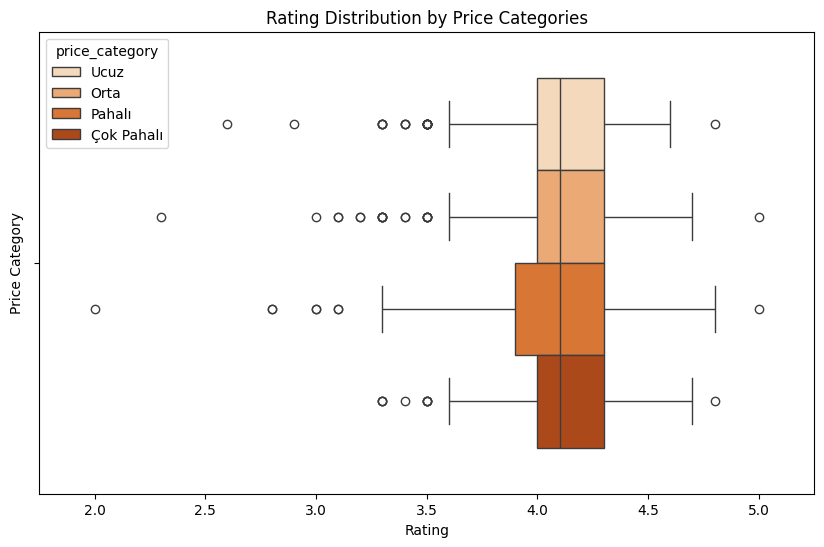

In [46]:
data['actual_price'] = data['actual_price'].replace('[\₹,]', '', regex=True).astype(float)

# Fiyat bilgisini daha anlaşılır gruplara bölmek (opsiyonel)
data['price_category'] = pd.qcut(data['actual_price'], 4, labels=["Ucuz", "Orta", "Pahalı", "Çok Pahalı"])

# Derecelendirmeleri sayısal tipe çevirme
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Boxplot çizdirme
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='rating', hue='price_category', palette='Oranges')
plt.title('Rating Distribution by Price Categories')
plt.xlabel('Rating')
plt.ylabel('Price Category')
plt.xticks(ticks=[i * 0.5 for i in range(4, 11)],  # 2.0'dan 5.0'a kadar yarım puanlar için 4'ten 10'a (5.0 dahil)
           labels=[f"{i/2:.1f}" for i in range(4, 11)])  # Etiketler 2.0, 2.5, ..., 5.0

plt.xlim(1.75, 5.25) 
plt.show()

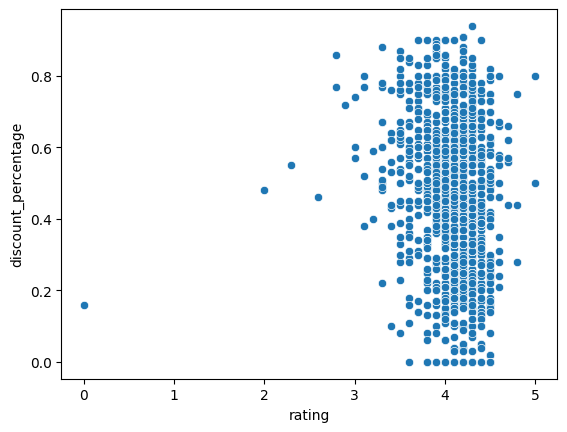

In [47]:
sns.scatterplot(data,x='rating', y='discount_percentage')
plt.show()

In [48]:
data.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category,subcategory,main_category,price_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399,1099.0,0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,USBCables,Cables,Cables&Accessories,Orta
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199,349.0,0.43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,USBCables,Cables,Cables&Accessories,Ucuz
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199,1899.0,0.9,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,USBCables,Cables,Cables&Accessories,Pahalı
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329,699.0,0.53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,USBCables,Cables,Cables&Accessories,Ucuz
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154,399.0,0.61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,USBCables,Cables,Cables&Accessories,Ucuz


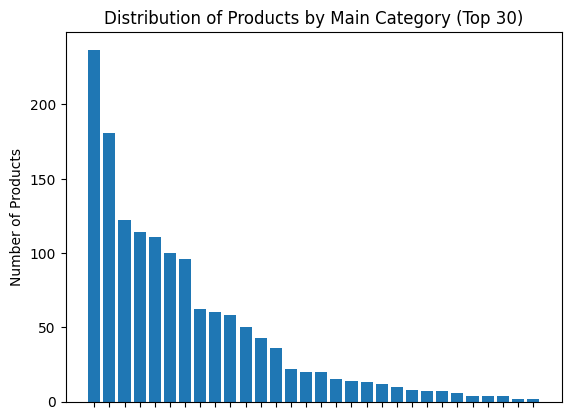

Top 30 main categories:
                 Main Category  Number of Products
            Cables&Accessories                 237
        Kitchen&HomeAppliances                 181
          HomeTheater,TV&Video                 122
       Accessories&Peripherals                 114
    Heating,Cooling&AirQuality                 111
           Mobiles&Accessories                 100
                   Electronics                  96
Headphones,Earbuds&Accessories                  62
             MobileAccessories                  60
                   Accessories                  58
         Computers&Accessories                  50
        SmallKitchenAppliances                  43
    Irons,Steamers&Accessories                  36
       Vacuum,Cleaning&Ironing                  22
             NetworkingDevices                  20
             Vacuums&FloorCare                  20
                     HomeAudio                  15
      HomeStorage&Organization                  14
       

In [27]:

#3.1
# Analyzing distribution of products by main category
main_category_counts = data['main_category'].value_counts()[:30] # Select only the top 30 main categories.
plt.bar(range(len(main_category_counts)), main_category_counts.values)
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Main Category (Top 30)')
plt.xticks(range(len(main_category_counts)), '') # hide X-axis labels
plt.show()

# Top 30 main categories 
top_main_categories = pd.DataFrame({'Main Category': main_category_counts.index, 'Number of Products': main_category_counts.values})
print('Top 30 main categories:')
print(top_main_categories.to_string(index=False))

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
plt.hist(data['rating'], bins=10, edgecolor='black') 
plt.xlabel('Puan')
plt.ylabel('Yorum Sayısı')
plt.title('Müşteri Puanlarının Dağılımı')
plt.xticks(rotation=45) 
plt.show()
bins = [0, 1, 2, 3, 4, 5] 
data['cluster'] = pd.cut(data['rating'], bins=bins, include_lowest=True, labels=['2-3', '2-3', '3-4', '4-5'])

NameError: name 'data' is not defined

In [51]:
!pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


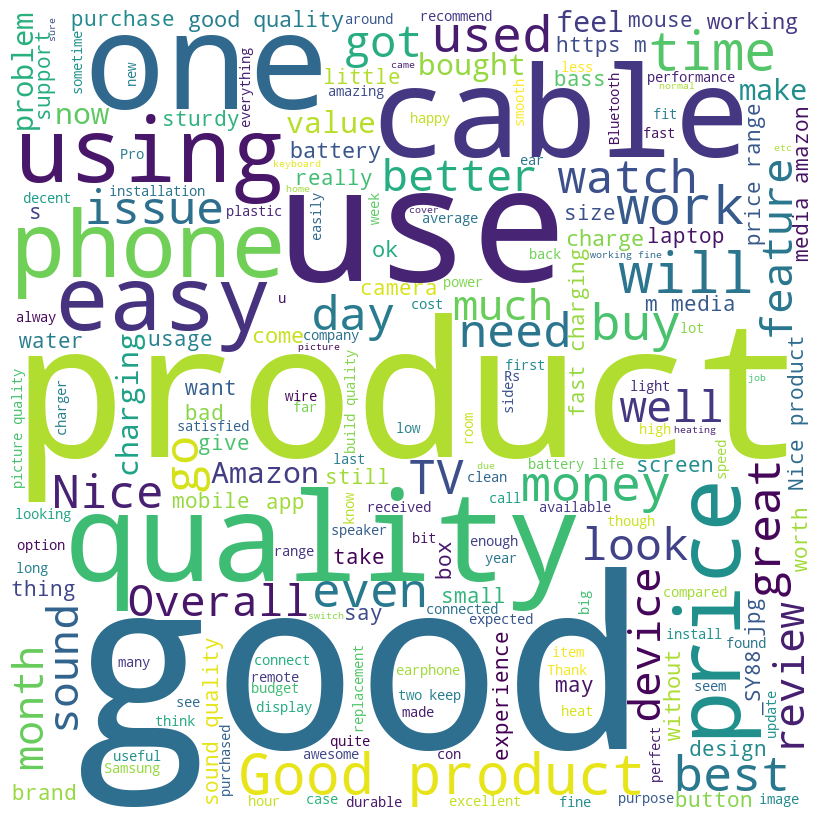

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews_text = ' '.join(data['review_content'].dropna().values)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(reviews_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

C:\Users\asina\AppData\Local\Temp\ipykernel_32260\193960062.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sub_cat_filtered, x='rating', y='subcategory', orient='h', palette=palette)


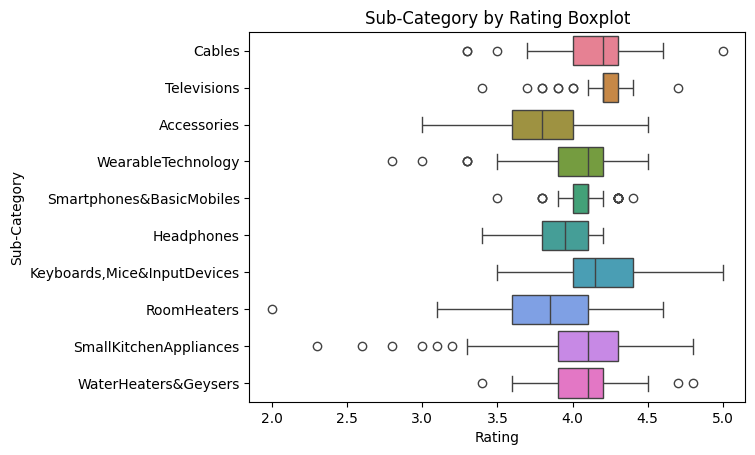

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# En popüler 10 alt kategoriyi seçelim
top_subcategory = data['subcategory'].value_counts().head(10).index
sub_cat_filtered = data[data['subcategory'].isin(top_subcategory)]

# Renk paleti seçelim
palette = sns.color_palette("husl", len(top_subcategory))

# Boxplot oluşturma
sns.boxplot(data=sub_cat_filtered, x='rating', y='subcategory', orient='h', palette=palette)
plt.title("Sub-Category by Rating Boxplot")
plt.xlabel("Rating")
plt.ylabel("Sub-Category")
plt.show()

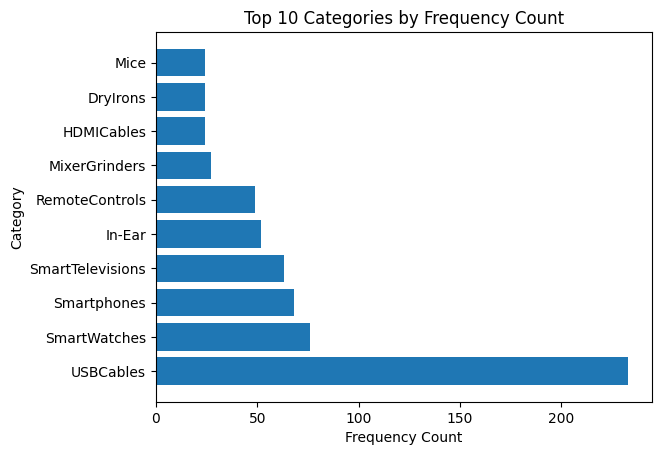

In [34]:
category_counts = data['category'].value_counts().sort_values(ascending = False)
top_10_categories = category_counts.head(10)

plt.barh(top_10_categories.index, top_10_categories.values)
plt.xlabel('Frequency Count')
plt.ylabel('Category')
plt.title('Top 10 Categories by Frequency Count')
plt.show()

In [8]:
import pandas as pd

# Veriyi yükleme
file_path = 'C:\\Users\\asina\\OneDrive\\Masaüstü\\bitirme\\amazon.csv'
data = pd.read_csv(file_path)

# Fiyat ve diğer sayısal sütunları temizleme ve sayısal tipe dönüştürme
data['discounted_price'] = data['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
data['actual_price'] = data['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
data['discount_percentage'] = data['discount_percentage'].str.replace('%', '').astype(float)


data['rating'] = data['rating'].astype(str)
data['rating_count'] = data['rating_count'].astype(str)

# Sayısal olmayan değerleri bulma fonksiyonu
def find_non_numeric_values(column):
    return column[~column.str.replace('.', '', 1).str.isnumeric()]


non_numeric_ratings = find_non_numeric_values(data['rating'])

# rating_count sütunundaki sayısal olmayan değerleri bulma
non_numeric_rating_count = find_non_numeric_values(data['rating_count'])

# Hatalı verileri düzeltme veya temizleme
data = data[~data['rating'].isin(non_numeric_ratings)]
data = data[~data['rating_count'].isin(non_numeric_rating_count)]

# Dönüştürme işlemini tekrar deneme
data['rating'] = data['rating'].astype(float)
data['rating_count'] = data['rating_count'].str.replace(',', '').astype(float)

# Aykırı değerleri belirleme fonksiyonu
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Aykırı değerleri tespit etme
outliers_discounted_price = detect_outliers(data, 'discounted_price')
outliers_actual_price = detect_outliers(data, 'actual_price')
outliers_discount_percentage = detect_outliers(data, 'discount_percentage')
outliers_rating = detect_outliers(data, 'rating')
outliers_rating_count = detect_outliers(data, 'rating_count')

# Sonuçları gösterme
outliers_discounted_price.shape, outliers_actual_price.shape, outliers_discount_percentage.shape, outliers_rating.shape, outliers_rating_count.shape

((38, 16), (40, 16), (10, 16), (9, 16), (0, 16))

C:\Users\asina\AppData\Local\Temp\ipykernel_33092\1894379538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_data['main_category_label'] = top_data['main_category'].map(main_category_labels)
C:\Users\asina\AppData\Local\Temp\ipykernel_33092\1894379538.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_data, x='rating', y='main_category_label', palette='Set3')


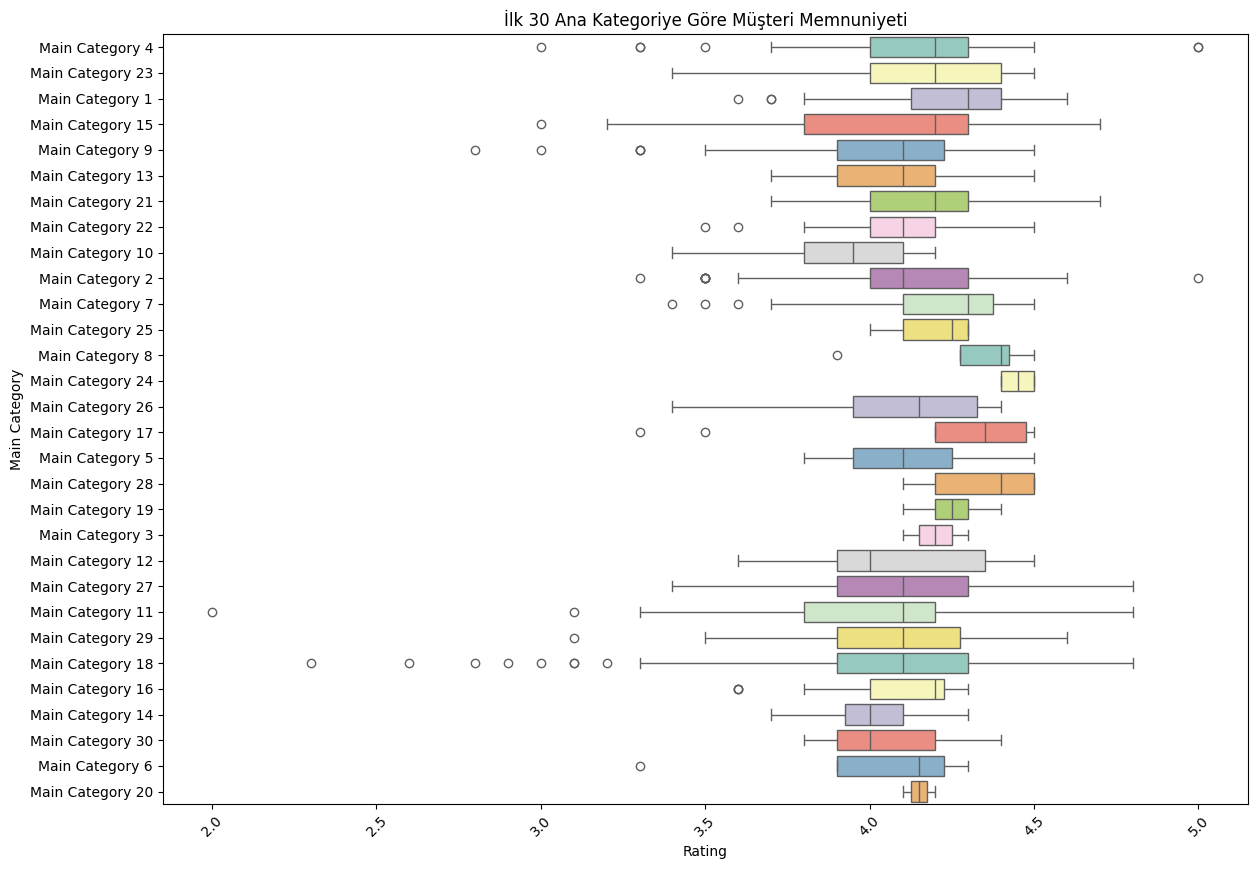

Main Category Labels:
Main Category 1: Accessories
Main Category 2: Accessories&Peripherals
Main Category 3: Audio&VideoAccessories
Main Category 4: Cables&Accessories
Main Category 5: Cameras&Photography
Main Category 6: Coffee,Tea&Espresso
Main Category 7: Computers&Accessories
Main Category 8: CraftMaterials
Main Category 9: Electronics
Main Category 10: Headphones,Earbuds&Accessories
Main Category 11: Heating,Cooling&AirQuality
Main Category 12: Home&Kitchen
Main Category 13: HomeAudio
Main Category 14: HomeStorage&Organization
Main Category 15: HomeTheater,TV&Video
Main Category 16: Irons,Steamers&Accessories
Main Category 17: Keyboards,Mice&InputDevices
Main Category 18: Kitchen&HomeAppliances
Main Category 19: LaptopAccessories
Main Category 20: LaundryOrganization
Main Category 21: MobileAccessories
Main Category 22: Mobiles&Accessories
Main Category 23: NetworkingDevices
Main Category 24: OfficeElectronics
Main Category 25: Pens,Pencils&WritingSupplies
Main Category 26: Printe

In [33]:
top_main_categories = data['main_category'].value_counts().index[:30]
top_data = data[data['main_category'].isin(top_main_categories)]

# Ana kategorileri numaralandırma ve sıralama
main_category_labels = {name: f"Main Category {i+1}" for i, name in enumerate(sorted(top_main_categories))}
top_data['main_category_label'] = top_data['main_category'].map(main_category_labels)

# Boxplot görselleştirme
plt.figure(figsize=(14, 10))
sns.boxplot(data=top_data, x='rating', y='main_category_label', palette='Set3')
plt.title('İlk 30 Ana Kategoriye Göre Müşteri Memnuniyeti')
plt.xlabel('Rating')
plt.ylabel('Main Category')
plt.xticks(rotation=45)  # X ekseni etiketlerini döndür
plt.show()

# Ana kategori etiket tablosunu yazdırma
print("Main Category Labels:")
for name, label in main_category_labels.items():
    print(f"{label}: {name}")

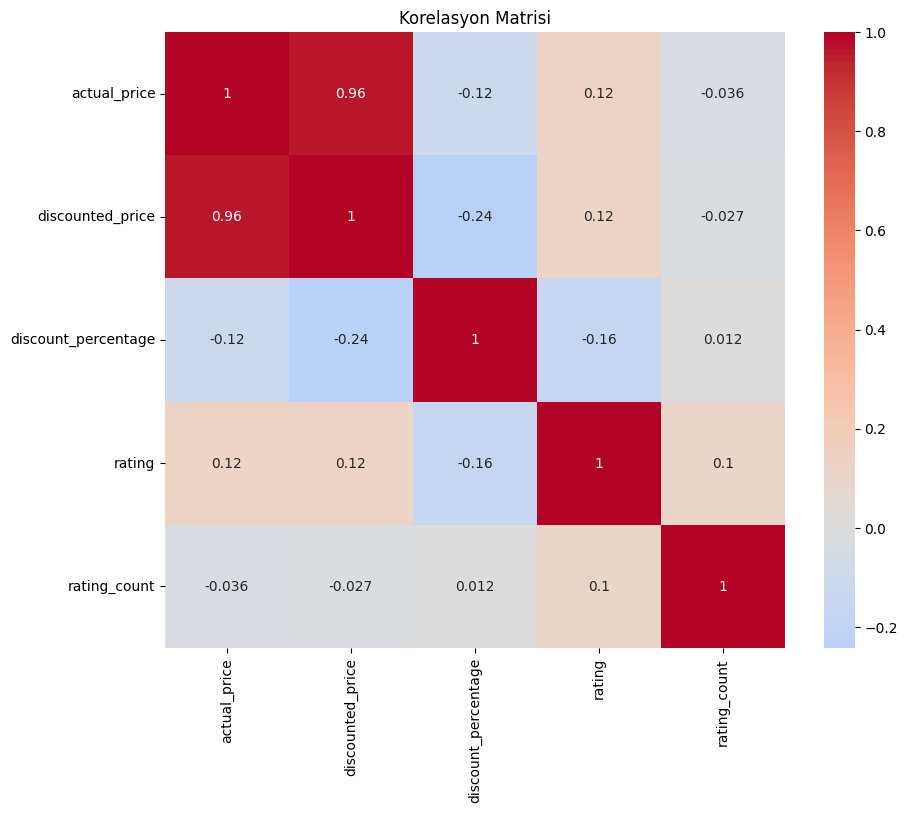

Korelasyon Katsayısı:
                     actual_price  discounted_price  discount_percentage  \
actual_price             1.000000          0.961915            -0.118098   
discounted_price         0.961915          1.000000            -0.242412   
discount_percentage     -0.118098         -0.242412             1.000000   
rating                   0.121642          0.120337            -0.155375   
rating_count            -0.036137         -0.027261             0.011691   

                       rating  rating_count  
actual_price         0.121642     -0.036137  
discounted_price     0.120337     -0.027261  
discount_percentage -0.155375      0.011691  
rating               1.000000      0.102235  
rating_count         0.102235      1.000000  


In [64]:

# Korelasyon matrisini hesaplama
corr_matrix = data[['actual_price', 'discounted_price', 'discount_percentage', 'rating', 'rating_count']].corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasyon Matrisi')
plt.show()

# Korelasyon katsayısını yazdırma
print("Korelasyon Katsayısı:")
print(corr_matrix)

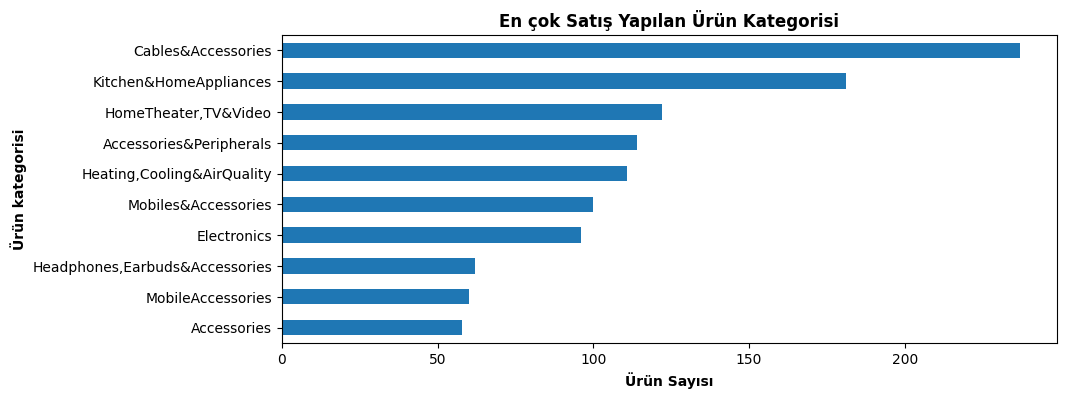

In [59]:
top10_main_categories = data['main_category'].value_counts().head(10)
top10_main_categories.sort_values().plot(kind='barh', figsize=(10, 4))
plt.title("En çok Satış Yapılan Ürün Kategorisi", fontweight='bold')
plt.xlabel("Ürün Sayısı", fontweight='bold')
plt.ylabel("Ürün ", fontweight='bold')
plt.show()